## Contents

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

1. sex: 1 for female and 2 for male.
2. age: of the patient.
3. classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
4. patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
5. pneumonia: whether the patient already have air sacs inflammation or not.
6. pregnancy: whether the patient is pregnant or not.
7. diabetes: whether the patient has diabetes or not.
8. copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
9. asthma: whether the patient has asthma or not.
10. inmsupr: whether the patient is immunosuppressed or not.
11. hypertension: whether the patient has hypertension or not.
12. cardiovascular: whether the patient has heart or blood vessels related disease.
13. renal chronic: whether the patient has chronic renal disease or not.
14. other disease: whether the patient has other disease or not.
15. obesity: whether the patient is obese or not.
16. tobacco: whether the patient is a tobacco user.
17. usmr: Indicates whether the patient treated medical units of the first, second or third level.
18. medical unit: type of institution of the National Health System that provided the care.
19. intubed: whether the patient was connected to the ventilator.
20. icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
21. date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# Data Preparation and Cleaning

1. Read the file using Pandas
2. Look at some information about the file on rows and columns (Data type)
3. Check missing values


In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
# Read the file and convert it into Pandas DataFrame.

datafile_name= '/Users/sakshumsingh/Workspace/Case-Studies/Covid Data.csv'
datafrm= pd.read_csv(datafile_name)
datafrm

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [250]:
# Check top five rows of the dataset

datafrm.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [251]:
# Look into null-values, data type of the columns, and column list

# Looks like all the cells are non null. However, data indicates values as 97 and 99 are missing data.

datafrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [252]:
# Check column namess

datafrm.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [253]:
# Look into the columns and count values and percentage for each category

# Check for missing data, The data set indicates that 97 and 99 are missing data.

for col in datafrm.columns:
    print("\nColumn:", col)
    val = datafrm[col].value_counts()
    total_sum= val.sum()
    val_percent = ((val / total_sum) * 100).round(2)
    result= val.astype(str) + " (" + val_percent.astype(str) + "%)"
    col_info= pd.DataFrame(result)
    print(col_info)


Column: USMER
             USMER
2  662903 (63.22%)
1  385672 (36.78%)

Column: MEDICAL_UNIT
       MEDICAL_UNIT
12  602995 (57.51%)
4   314405 (29.98%)
6     40584 (3.87%)
9     38116 (3.64%)
3     19175 (1.83%)
8     10399 (0.99%)
10     7873 (0.75%)
5      7244 (0.69%)
11     5577 (0.53%)
13      996 (0.09%)
7       891 (0.08%)
2       169 (0.02%)
1       151 (0.01%)

Column: SEX
               SEX
1  525064 (50.07%)
2  523511 (49.93%)

Column: PATIENT_TYPE
      PATIENT_TYPE
1  848544 (80.92%)
2  200031 (19.08%)

Column: DATE_DIED
                  DATE_DIED
9999-99-99  971633 (92.66%)
06/07/2020      1000 (0.1%)
07/07/2020      996 (0.09%)
13/07/2020      990 (0.09%)
16/06/2020      979 (0.09%)
...                     ...
24/11/2020         1 (0.0%)
17/12/2020         1 (0.0%)
08/12/2020         1 (0.0%)
16/03/2021         1 (0.0%)
22/04/2021         1 (0.0%)

[401 rows x 1 columns]

Column: INTUBED
            INTUBED
97  848544 (80.92%)
2   159050 (15.17%)
1     33656 (3.21%)
9

The values 97 and 99 represents the missing data.
1. Column Intubed has 80.92% missing data, Pregnant 49.93% missing data and ICU has 80.92% missing data so they cannot be used in our analysis.

In [254]:
datafrm['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

Value 98 is not defined in the data set, it appears in columns Pregnant, Diabities, COPD, Asthma, IMNSUPR, HIPERTENSION, OTHER_DISEASE, CARDIOVASCULAR, OBESITY, RENAL_CHRONIC, TOBACCO, and ICU. Since it is less than in each column it can be left as it is. 

In [255]:
# Drop the columns that cannot be used for the analysis

df= datafrm.drop(['PREGNANT','INTUBED','ICU'], axis= 1)
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,1,2,2,2,1,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,2,2,2,2,2,2,2,7
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,2,1,2,2,2,2,2,7
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,2,2,2,2,2,2,2,7
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,2,2,2,2,2,2,2,7


## Data Manupulation

1. Date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.
2. Create a new column DIED, 'Yes' means Died and 'No' means Lived.
3. Replace 1 with F and 2 with M


In [257]:
# Create a new column DIED, 'Yes' means Died and 'No' means Lived.

df.loc[df['DATE_DIED']== '9999-99-99', 'DIED']= 'No'
df.loc[df['DATE_DIED'] != '9999-99-99', 'DIED']= 'Yes'
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,1,2,2,2,2,2,3,Yes
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,1,2,2,1,1,2,5,Yes
2,2,1,2,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,3,Yes
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,7,Yes
4,2,1,2,1,21/06/2020,2,68,1,2,2,2,1,2,2,2,2,2,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,2,2,2,2,2,2,2,7,No
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,2,1,2,2,2,2,2,7,No
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,2,2,2,2,2,2,2,7,No
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,2,2,2,2,2,2,2,7,No


In [258]:
# Replace Interger values by Gender, F for Female, M for Male.

df.loc[df['SEX']== 1,'SEX']= 'F'
df.loc[df['SEX']== 2,'SEX']= 'M'
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,F,1,03/05/2020,1,65,2,2,2,2,1,2,2,2,2,2,3,Yes
1,2,1,M,1,03/06/2020,1,72,2,2,2,2,1,2,2,1,1,2,5,Yes
2,2,1,M,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,3,Yes
3,2,1,F,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,7,Yes
4,2,1,M,1,21/06/2020,2,68,1,2,2,2,1,2,2,2,2,2,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,M,1,9999-99-99,2,40,2,2,2,2,2,2,2,2,2,2,7,No
1048571,1,13,M,2,9999-99-99,2,51,2,2,2,2,1,2,2,2,2,2,7,No
1048572,2,13,M,1,9999-99-99,2,55,2,2,2,2,2,2,2,2,2,2,7,No
1048573,2,13,M,1,9999-99-99,2,28,2,2,2,2,2,2,2,2,2,2,7,No


In [ ]:
#Percentage of males affected
males= df[df['SEX']== 'M']
round(((len(males.index)/ len(df.index)) * 100),2)

49.93

In [ ]:
# Percentage of females affected
females= df[df['SEX']== 'F']
round(((len(females.index) / len(df.index)) * 100),2)

50.07

## Classification: Covid test findings
Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

In [ ]:
# adding a new column age range and binning the age of patients


df['Age_Seg'] = pd.cut(df['AGE'], 
                             bins=[0, 1, 5, 19, 30, 40, 50, 60, 70, 80, 90, 100, 120], 
                             labels=['0-1', '1-5', '5-19', '20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'Above 100'])

df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED,Age_Seg
0,2,1,F,1,03/05/2020,1,65,2,2,2,2,1,2,2,2,2,2,3,Yes,61-70
1,2,1,M,1,03/06/2020,1,72,2,2,2,2,1,2,2,1,1,2,5,Yes,71-80
2,2,1,M,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,3,Yes,51-60
3,2,1,F,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,7,Yes,51-60
4,2,1,M,1,21/06/2020,2,68,1,2,2,2,1,2,2,2,2,2,3,Yes,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,M,1,9999-99-99,2,40,2,2,2,2,2,2,2,2,2,2,7,No,31-40
1048571,1,13,M,2,9999-99-99,2,51,2,2,2,2,1,2,2,2,2,2,7,No,51-60
1048572,2,13,M,1,9999-99-99,2,55,2,2,2,2,2,2,2,2,2,2,7,No,51-60
1048573,2,13,M,1,9999-99-99,2,28,2,2,2,2,2,2,2,2,2,2,7,No,20-30


In [ ]:
# Number of people diagnosed with covid in different stages and otherwise.

df['CLASIFFICATION_FINAL'].isin([1,2,3]).value_counts()

False    656596
True     391979
Name: CLASIFFICATION_FINAL, dtype: int64

In [ ]:
# People infected by covid virus
covid_infected = df[df['CLASIFFICATION_FINAL'].isin([1,2,3])]
covid_infected

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED,Age_Seg
0,2,1,F,1,03/05/2020,1,65,2,2,2,2,1,2,2,2,2,2,3,Yes,61-70
2,2,1,M,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,3,Yes,51-60
4,2,1,M,1,21/06/2020,2,68,1,2,2,2,1,2,2,2,2,2,3,Yes,61-70
5,2,1,F,2,9999-99-99,1,40,2,2,2,2,2,2,2,2,2,2,3,No,31-40
6,2,1,F,1,9999-99-99,2,64,2,2,2,2,2,2,2,2,2,2,3,No,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,F,2,9999-99-99,2,77,1,2,2,1,1,2,2,2,2,2,3,No,71-80
1047934,1,13,F,1,9999-99-99,2,55,1,2,2,2,2,2,2,2,2,2,3,No,51-60
1047935,1,13,M,1,9999-99-99,2,70,2,2,2,2,1,2,2,2,2,2,3,No,61-70
1047936,2,13,M,1,9999-99-99,2,32,2,2,2,2,2,2,2,2,2,2,3,No,31-40


In [291]:
# Group the number of people and calculate sum of infected by Covid in different stages and sex across each column.

df_by_gender = covid_infected.groupby(['CLASIFFICATION_FINAL','SEX']).sum()
df_by_gender


/var/folders/v9/rgx0l6cn07j5nt4bm2d4z6500000gn/T/ipykernel_21384/211266525.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_gender = covid_infected.groupby(['CLASIFFICATION_FINAL','SEX']).sum()


USMER  MEDICAL_UNIT  PATIENT_TYPE  PNEUMONIA  \
CLASIFFICATION_FINAL SEX                                                  
1                    F      6839         41282          4808       7420   
                     M      8037         45922          5995       8067   
2                    F       942          4078          1271        918   
                     M      1773          7479          2265       1656   
3                    F    290016       1549631        218953     324321   
                     M    329225       1761021        269979     355923   

                              AGE  DIABETES    COPD  ASTHMA  INMSUPR  \
CLASIFFICATION_FINAL SEX                                               
1                    F     172020     10509   10575   10405    10865   
                     M     203971     14203   14111   13432    14325   
2                    F      42708      1714    2138    2168     2162   
                     M      72691      4487    5225    5440     5045   
3                    F    7890972    376990  396673  393194   403536   
                     M    9330066    452181  475153  474571   482356   

                          HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  \
CLASIFFICATION_FINAL SEX                                                
1                    F           10199          11815           11217   
                     M           14212          15153           14167   
2                    F            1869           2148            1959   
                     M            4796           5110            5116   
3                    F          366298         427013          398928   
                     M          443105         517757          477601   

                          OBESITY  RENAL_CHRONIC  TOBACCO  
CLASIFFICATION_FINAL SEX                                   
1                    F      10162          10852    10282  
                     M      13282          13817    13395  
2                    F       1752           1936     1968  
                     M       4373           5090     5067  
3                    F     366609         397737   394626  
                     M     444894         476174   467537

In [ ]:
# People died of covid

died = df[df['DIED']== "Yes"] 
died

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED,Age_Seg
0,2,1,F,1,03/05/2020,1,65,2,2,2,2,1,2,2,2,2,2,3,Yes,61-70
1,2,1,M,1,03/06/2020,1,72,2,2,2,2,1,2,2,1,1,2,5,Yes,71-80
2,2,1,M,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,3,Yes,51-60
3,2,1,F,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,7,Yes,51-60
4,2,1,M,1,21/06/2020,2,68,1,2,2,2,1,2,2,2,2,2,3,Yes,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,M,2,18/07/2020,1,73,2,2,2,2,1,2,2,1,2,2,3,Yes,71-80
1047636,1,13,M,1,26/07/2020,1,82,2,1,2,2,1,2,2,2,2,2,3,Yes,81-90
1047637,1,13,F,1,27/07/2020,1,82,2,2,2,2,2,2,2,2,2,2,3,Yes,81-90
1047638,1,13,M,2,29/07/2020,1,80,2,2,2,2,2,2,2,1,2,2,3,Yes,71-80


In [294]:
# Number of people died

df_by_deaths = died.groupby(['CLASIFFICATION_FINAL']).sum()
df_by_deaths

/var/folders/v9/rgx0l6cn07j5nt4bm2d4z6500000gn/T/ipykernel_21384/3917046710.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_deaths = died.groupby(['CLASIFFICATION_FINAL']).sum()


,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
CLASIFFICATION_FINAL,,,,,,,,,,,,,,,
1,1464,8532,1830,1191,58030,5209,5428,4874,5632,5502,6177,5419,4991,5130,4995
2,2715,11557,3536,2574,115399,6201,7363,7608,7207,6665,7258,7075,6125,7026,7035
3,73452,365035,98048,64039,3163610,117194,131449,133305,135215,112699,149386,134785,123371,131834,132768
4,197,1353,281,359,8490,343,387,390,390,349,582,385,371,383,380
5,1802,8939,2311,5259,72926,3057,3122,3362,3338,3206,5498,3886,3311,3172,3454
6,11806,48571,14476,14685,468371,29034,31619,31544,31239,27457,33591,30450,33278,30555,30316
7,19293,95280,26526,83052,811910,34757,38751,38905,40725,32185,46110,37817,33783,37565,37940


In [ ]:
# group rows by sex that have the classification as 1, 2, 3. 

df['CLASIFFICATION_FINAL'].isin([1,2,3]).groupby(df['SEX']).sum()

SEX
F    182490
M    209489
Name: CLASIFFICATION_FINAL, dtype: int64

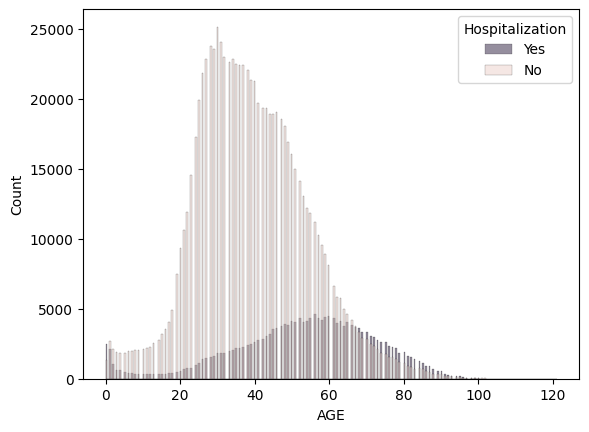

In [ ]:
# Patient type by age i.e. yes means the patient was hospitalised and no means returned home

patient_type = sns.histplot(data = df, x='AGE', hue = 'PATIENT_TYPE') 
plt.legend(title='Hospitalization', loc='upper right', labels=['Yes', 'No'])
plt.show(patient_type)

Text(0.5, 0, 'AGE')

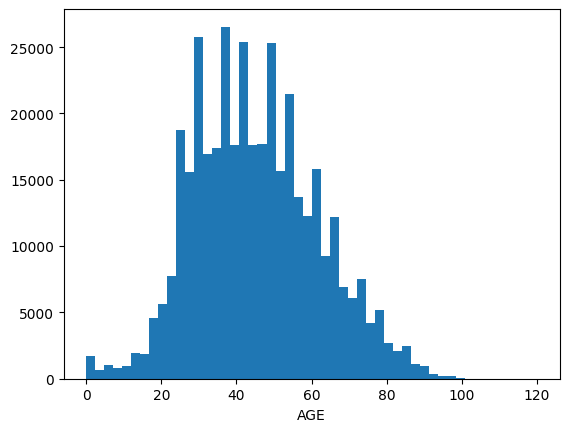

In [271]:
# Age distribution of people infected by COVID 
plt.hist(covid_infected['AGE'],bins=50)
plt.xlabel('AGE')

Text(0.5, 0, 'AGE')

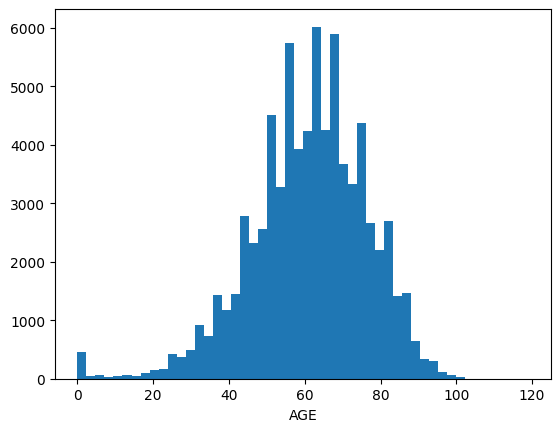

In [298]:
# Age distribution of people died due to covid by age

died = df[df['DIED']== "Yes"] 

plt.hist(died['AGE'], bins= 50)
plt.xlabel('AGE')


In [ ]:
# Check whether the graph below is working correct group the data by age and pneumonia 

cd= covid_infected.groupby('AGE')['PNEUMONIA'].value_counts()
cd.groupby('PNEUMONIA').sum()

PNEUMONIA
1      86041
2     305934
99         4
Name: PNEUMONIA, dtype: int64

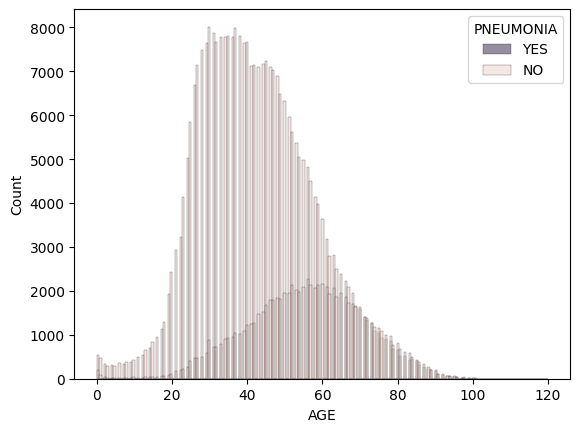

In [ ]:
# Age distribution of people who had covid and pneumonia as symptom

covid_infections = sns.histplot(data = covid_infected, x='AGE', hue = 'PNEUMONIA') 
plt.legend(title='PNEUMONIA', loc='upper right', labels=['YES','NO'])
plt.show(covid_infections)

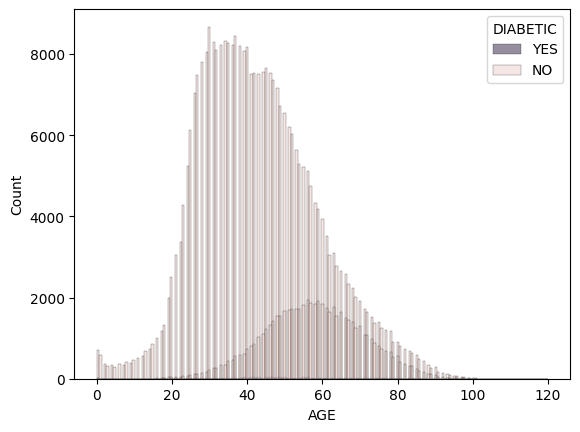

In [ ]:
# Age distribution of people who were infected by covid and had Diabetes

covid_infections = sns.histplot(data = covid_infected, x='AGE', hue = 'DIABETES') 
plt.legend(title='DIABETIC', loc='upper right', labels=['YES','NO'])
plt.show(covid_infections)

In [ ]:
# Covid Cases by age range

# count the number of values in each age
covid_count= covid_infected['Age_Seg'].value_counts()

covid_by_age = pd.DataFrame(data = covid_count) 
covid_by_age


covid_by_age['percnt_cases']= (((covid_count / covid_by_age['Age_Seg'].sum()) * 100).round(2)).astype(str) + '%'
covid_by_age= covid_by_age.sort_index(ascending=True)
covid_by_age=covid_by_age.rename(columns={'Age_Seg':'Count'})
covid_by_age.index.name= 'Age_Seg'
covid_by_age

,Count,percnt_cases
Age_Seg,,
0-1,578,0.15%
1-5,1309,0.33%
5-19,10910,2.79%
20-30,64902,16.59%
31-40,87153,22.28%
41-50,85979,21.98%
51-60,68963,17.63%
61-70,41626,10.64%
71-80,21199,5.42%


In [ ]:
# Deaths by age range

covid_deaths= died['Age_Seg'].value_counts()
death_by_age = pd.DataFrame(data=covid_deaths)
death_by_age['percnt_deaths']= (((covid_deaths / death_by_age['Age_Seg'].sum()) * 100).round(2)).astype(str) + '%'
death_by_age= death_by_age.sort_index(ascending=True)
death_by_age= death_by_age.rename(columns={'Age_Seg':'Count'})
death_by_age.index.name= 'Age_Seg'
death_by_age


,Count,percnt_deaths
Age_Seg,,
0-1,185,0.24%
1-5,124,0.16%
5-19,356,0.46%
20-30,1579,2.06%
31-40,4260,5.55%
41-50,10548,13.75%
51-60,18108,23.6%
61-70,20189,26.31%
71-80,14338,18.69%


Text(0.5, 1.0, 'Covid Deaths by Age')

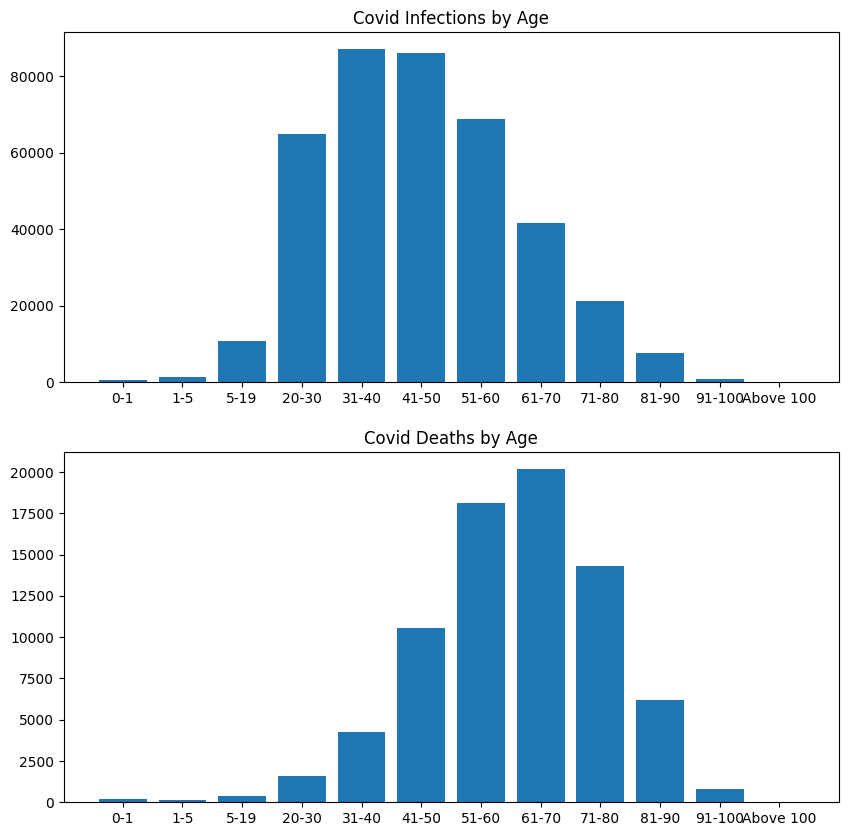

In [ ]:

    
fig, axes= plt.subplots(2,1,figsize= (10,10))

axes[0].bar(covid_by_age.index,covid_by_age['Count'])
axes[0].set_title('Covid Infections by Age')

axes[1].bar(death_by_age.index,death_by_age['Count'])
axes[1].set_title('Covid Deaths by Age')


In [ ]:
# def age_segment(num):
#     if num > 0 and num <=2:
#         return "Infant"
#     elif num > 2 and num <= 17:
#         return "Child"
#     elif num > 17 and num <= 65:
#         return "Adult"
#     else:
#         return "Elderly"

# died ['age_segment'] = died['AGE'].apply(age_segment)
# died

In [299]:
# age_segment_count= died['age_segment'].value_counts()
# age_segment_df = pd.DataFrame(data=age_segment_count)
# age_segment_df

In [300]:
# fig = plt.figure(figsize = (5, 5))
 
# # creating the bar plot
# plt.bar(age_segment_df.index, age_segment_df['age_segment'], color ='maroon',
#         width = 0.4)
 
# plt.xlabel("Age Segment")
# plt.ylabel("Died")
# plt.title("Died due to COVID by Age Segment")
# plt.show()